In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Eclipse Dataset ( Whole, Sim & Dissim)

In [3]:
#importing the CSV file of the dataset from google drive into a dataframe (Eclipse)
df_whole=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Eclipse/final_eclipse_data_15thmarch (1).csv')
df_whole

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Description,Duplicate_Bug_Ids
0,518088.0,Web Tools,Web Standard Tools,RESOLVED,INVALID,search widget is not working,2017-06-10 14:42:10,search widget is not working,NaN
1,546444.0,z_Archived,PDT,CLOSED,NOT_ECLIPSE,Bug,2020-05-14 11:25:40,created attachment eclipse hello world,NaN
2,533893.0,Platform,Website,RESOLVED,INVALID,AntCompareCVSDebugDocIDEIncubatorPMCRelengReso...,2018-04-22 12:23:23,created attachment error in website antcomp...,NaN
3,519449.0,PDE,UI,VERIFIED,FIXED,Problem with KEY_NAME,2017-08-03 03:21:28,in product pluginsection recommendedbundles m...,NaN
4,519450.0,JDT,UI,RESOLVED,FIXED,Problem with KEY_NAME,2017-07-13 09:43:02,in renametyperefactoring another type the tem...,NaN
...,...,...,...,...,...,...,...,...,...
33936,565658.0,Community,CI-Jenkins,CLOSED,FIXED,JIPP for uDig is dormant,2021-01-27 16:14:33,link to the jipp in question no builds h...,NaN
33937,565659.0,Community,CI-Jenkins,CLOSED,FIXED,JIPP for EGerrit is dormant,2021-01-27 14:41:59,link to the jipp in question no builds h...,NaN
33938,565660.0,Passage,API,CLOSED,FIXED,[Passage] API revision | restriction execution...,2020-09-08 09:08:05,current implementation of workbench restrictio...,NaN
33939,565661.0,Community,CI-Jenkins,CLOSED,FIXED,JIPP for OSBP is dormant,2021-01-27 16:06:10,link to the jipp in question no builds h...,NaN


In [4]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Eclipse/eclipse_textually_similar_duplicates_15thmarch (1).csv')
df_sim

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Average_Cos_Similarity_Score,Description,Duplicate_Bug_Ids
0,566466.0,Babel,translations,RESOLVED,DUPLICATE,Babel Language Packs R0.18.0 cannot work on 20...,2020-08-28 00:04:32,0.061559,i intalled the eclipse ide for c c developer...,565380.0
1,559752.0,JDT,Debug,CLOSED,DUPLICATE,breakpoints get incorrectly moved after some e...,2020-05-17 17:26:46,0.049846,i often find my breakpoint moved one or more l...,546957.0
2,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",2017-10-29 11:05:12,0.082606,since having a build xml file in a pl...,522581.0
3,536600.0,Xtend,Core,CLOSED,DUPLICATE,unable to provison xtend-maven-plugin 2.14.0 d...,2018-07-03 10:24:15,0.060668,created attachment build log from local pc ...,536445.0
4,514978.0,CDT,cdt-indexer,CLOSED,DUPLICATE,C/C++ indexer hangs on spectrum.h from PBRT v3,2017-04-09 17:50:44,0.053854,created attachment eclipse trace log when o...,513345.0
...,...,...,...,...,...,...,...,...,...,...
1617,548222.0,Equinox,Framework,RESOLVED,DUPLICATE,UnsupportedOperationException on startup of eq...,2019-06-13 09:05:40,0.083881,this sometimes happen after a while the onl...,543844.0
1618,527632.0,JDT,Core,VERIFIED,DUPLICATE,[rawtypes] Inconsistent classfile encountered:...,2018-05-01 05:42:52,0.077415,we have a large product with many plugins wi...,518157.0
1619,511734.0,ECP,EMF Forms,CLOSED,DUPLICATE,ClassCastException below ResourceSetHelpers.ad...,2017-03-02 08:29:02,0.081726,i think we can t do much about this as the res...,511735.0
1620,530693.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] Editor redrawn incorrectly on horizonta...,2018-12-07 08:22:41,0.056418,created attachment screenshot when horizo...,530841.0


In [5]:

#importing the CSV file of the dataset from google drive into a dataframe
df_dissim=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Eclipse/eclipse_textually_dissimilar_duplicates_15thmarch (1).csv')
df_dissim

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Average_Cos_Similarity_Score,Description,Duplicate_Bug_Ids
0,542863.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[terminate] polarsys.arcon,2018-12-18 14:22:13,0.032567,i ll use this bug to track the termination rev...,528221.0
1,526465.0,Community,Website,CLOSED,DUPLICATE,Update the Committer Guidelines,2017-11-23 12:28:29,0.042907,there is at least one reference to eclipse fo...,526738.0
2,553016.0,Dash,General,CLOSED,DUPLICATE,Create a tool that committers can use to valid...,2020-02-20 09:05:55,0.044699,we need to have a tool that committers can use...,560072.0
3,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,2021-10-19 04:47:14,0.027463,affected versions of this package are vulnerab...,574220.0
4,565069.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] tools.gef 5.3.0,2020-07-09 12:20:37,0.035858,we ll use this bug to track the release we re...,565088.0
...,...,...,...,...,...,...,...,...,...,...
1616,515396.0,Platform,SWT,CLOSED,DUPLICATE,[Wayland] dragDetect should block till DnD sta...,2018-12-13 13:43:42,0.038595,originally for dragdetect method blocked...,541635.0
1617,555561.0,Capella,UI,CLOSED,DUPLICATE,Double click shall not reveal/unreveal element,2020-11-17 10:24:38,0.010230,when opening properties view double click sha...,555559.0
1618,517957.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2][Ubuntu] Tiny icons in console tab views,2018-07-12 10:13:18,0.044188,created attachment screenshot with the open ...,530841.0
1619,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,2018-07-12 10:12:17,0.025458,when running smartgit on ubuntu t...,530841.0


## Statistics of dataset (all three for eclipse)

In [6]:
# Statistics of description for the whole dataset
FEATURES_whole = ['Description']
print('Description of length of the feature columns')
df_whole[FEATURES_whole].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,33941.000000
mean,776.144663
std,1859.670887
min,1.000000
25%,159.000000
50%,326.000000
75%,704.000000
max,51223.000000


In [7]:
# Statistics of description for the text dataset
FEATURES_sim = ['Description']
print('Description of length of the feature columns')
df_sim[FEATURES_sim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,1622.000000
mean,1968.131936
std,3608.225453
min,35.000000
25%,468.000000
50%,816.000000
75%,2026.500000
max,49375.000000


In [8]:
# Statistics of description for the text dataset
FEATURES_dissim = ['Description']
print('Description of length of the feature columns')
df_dissim[FEATURES_dissim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,1621.000000
mean,562.890191
std,2379.087981
min,3.000000
25%,145.000000
50%,255.000000
75%,469.000000
max,51223.000000


## Skewness & kurt of textually sim & dissim

Skewness:
1.18
kurt:
0.35
Mean:
0.07
Median:
0.06
Standard Deviation:
0.02


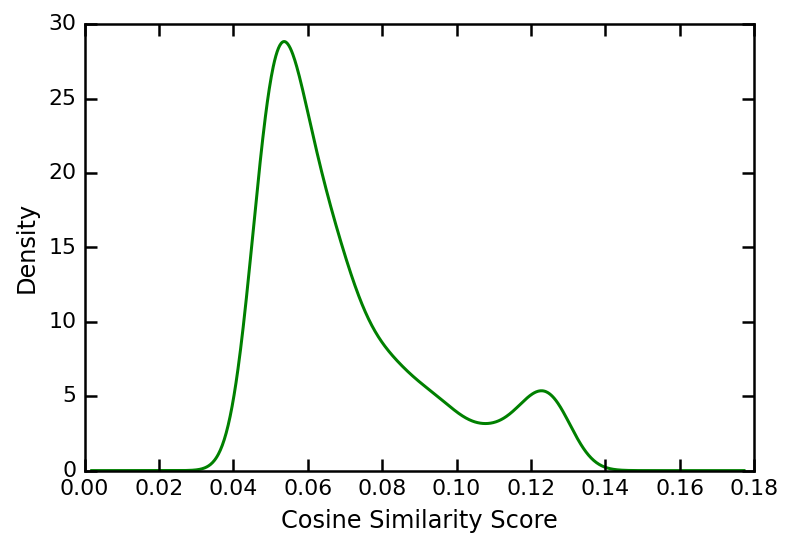

In [9]:
# Textually similar dataset
import pandas as pds

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];

skewness = df_sim_cos.skew();
kurt = df_sim_cos.kurt();
mean = df_sim_cos.mean()
median = df_sim_cos.median()
std = df_sim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
# Positive kurtosis indicates a relatively peaked distribution.


plt.figure()
df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

Skewness:
-0.62
kurt:
-0.27
Mean:
0.03
Median:
0.03
Standard Deviation:
0.01


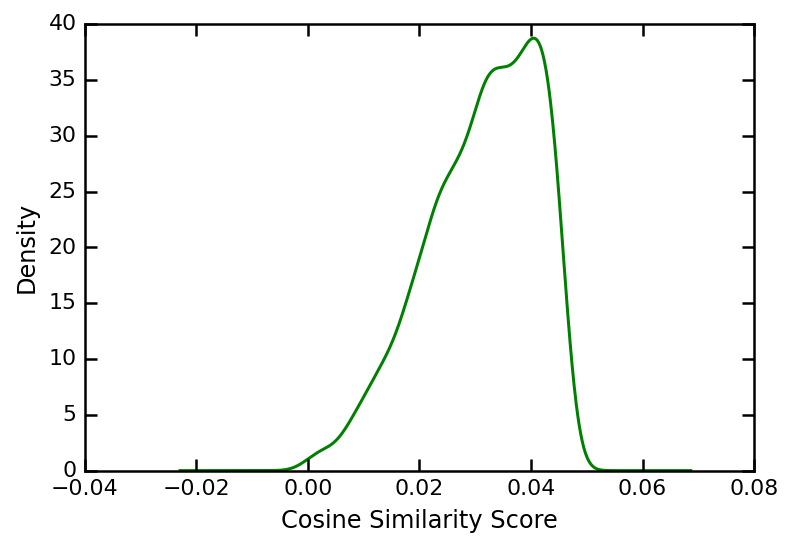

In [10]:
# Textually dissimilar dataset
import pandas as pds

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];

skewness = df_dissim_cos.skew();
kurt = df_dissim_cos.kurt();
mean = df_dissim_cos.mean()
median = df_dissim_cos.median()
std = df_dissim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# Negative kurtosis indicates a relatively flat distribution.
plt.figure()
df_dissim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

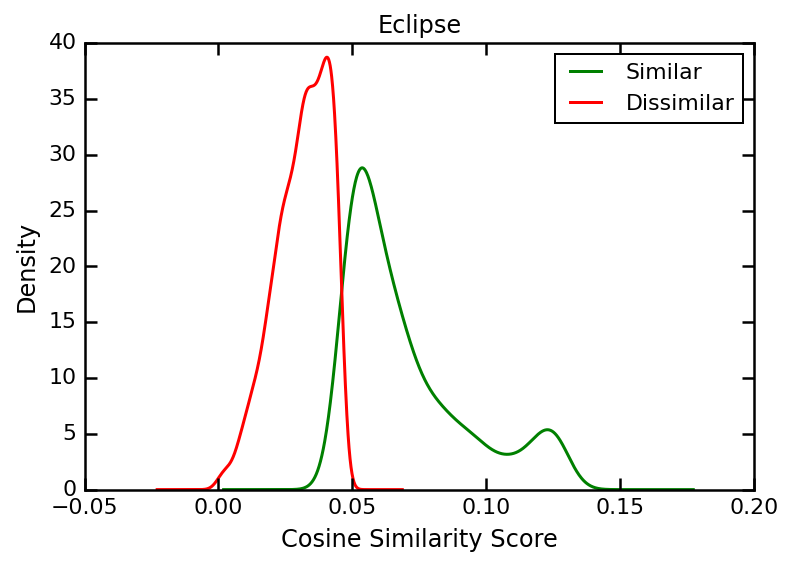

<Figure size 432x288 with 0 Axes>

In [12]:
# importing package
import matplotlib.pyplot as plt
  
# create data
fig, ax = plt.subplots(2)

# plot lines
ax = plt.axes()
x1= df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y1= df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Eclipse')

# plt.plot(x1)
# plt.plot(y1)


plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()
plt.savefig('Eclipse dist.png')

## plotting the cosine similarity score difference


In [ ]:
#fig1 = plt.figure()
#fig1.savefig('my_figure1.png')

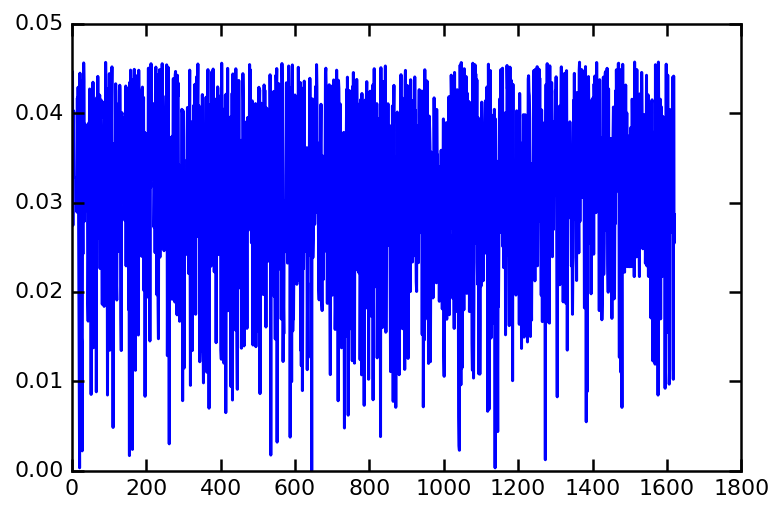

In [ ]:
df_dissim["Average_Cos_Similarity_Score"].plot()

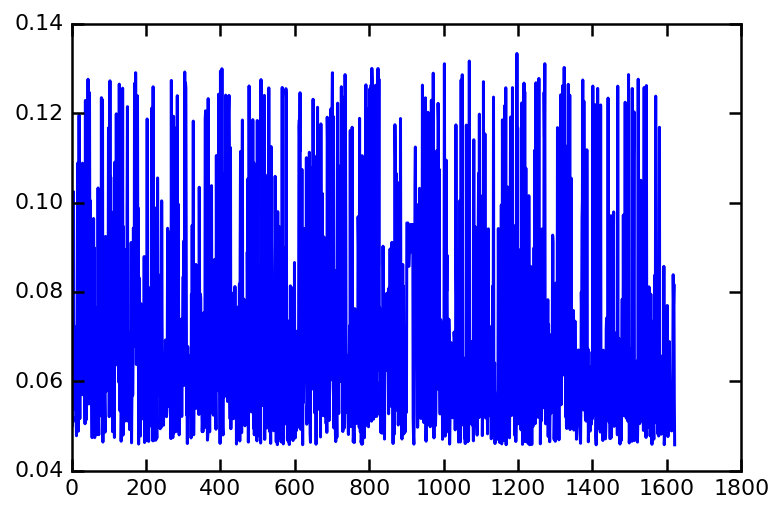

In [ ]:
df_sim["Average_Cos_Similarity_Score"].plot()

## Sorting by cosine value for sim & dis

In [20]:
# Textually similar
df_sim_sort = df_sim.copy()
df_sim_sort

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Average_Cos_Similarity_Score,Description,Duplicate_Bug_Ids
0,566466.0,Babel,translations,RESOLVED,DUPLICATE,Babel Language Packs R0.18.0 cannot work on 20...,2020-08-28 00:04:32,0.061559,i intalled the eclipse ide for c c developer...,565380.0
1,559752.0,JDT,Debug,CLOSED,DUPLICATE,breakpoints get incorrectly moved after some e...,2020-05-17 17:26:46,0.049846,i often find my breakpoint moved one or more l...,546957.0
2,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",2017-10-29 11:05:12,0.082606,since having a build xml file in a pl...,522581.0
3,536600.0,Xtend,Core,CLOSED,DUPLICATE,unable to provison xtend-maven-plugin 2.14.0 d...,2018-07-03 10:24:15,0.060668,created attachment build log from local pc ...,536445.0
4,514978.0,CDT,cdt-indexer,CLOSED,DUPLICATE,C/C++ indexer hangs on spectrum.h from PBRT v3,2017-04-09 17:50:44,0.053854,created attachment eclipse trace log when o...,513345.0
...,...,...,...,...,...,...,...,...,...,...
1617,548222.0,Equinox,Framework,RESOLVED,DUPLICATE,UnsupportedOperationException on startup of eq...,2019-06-13 09:05:40,0.083881,this sometimes happen after a while the onl...,543844.0
1618,527632.0,JDT,Core,VERIFIED,DUPLICATE,[rawtypes] Inconsistent classfile encountered:...,2018-05-01 05:42:52,0.077415,we have a large product with many plugins wi...,518157.0
1619,511734.0,ECP,EMF Forms,CLOSED,DUPLICATE,ClassCastException below ResourceSetHelpers.ad...,2017-03-02 08:29:02,0.081726,i think we can t do much about this as the res...,511735.0
1620,530693.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] Editor redrawn incorrectly on horizonta...,2018-12-07 08:22:41,0.056418,created attachment screenshot when horizo...,530841.0


In [21]:
#highest textual similarity in textual similar dataset
df_sim_sort= df_sim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending=False, inplace=False, kind='quicksort')
df_sim_sort.reset_index(drop=True, inplace=True)
df_sim_sort= df_sim_sort[:385]

In [22]:
df_sim_sort= df_sim_sort.sample(frac=1).reset_index(drop=True)
df_sim_sort['Average_Cos_Similarity_Score'].values.tolist()

[0.123540845159757,
 0.1168633753038399,
 0.1264161519542748,
 0.1219148468231704,
 0.1295044976974485,
 0.0828413303198459,
 0.0866406069197936,
 0.0901318466359442,
 0.0902665236953843,
 0.0995116156280442,
 0.124059876779879,
 0.0892807043267761,
 0.1231903762661212,
 0.1259848145863132,
 0.0838812772538774,
 0.1015676562404696,
 0.0866109873950641,
 0.1192167027954956,
 0.0946615586890522,
 0.0946045261132629,
 0.1168498013733335,
 0.125477583332919,
 0.0875812303211975,
 0.1124844836988116,
 0.0910510725215905,
 0.0988935422688829,
 0.1300482215438944,
 0.0872772180302366,
 0.0874199249378793,
 0.0826922246763096,
 0.1118659788078906,
 0.1261473642237063,
 0.0888508456842366,
 0.0830998516320833,
 0.0824030118524827,
 0.1212024702195838,
 0.1032293369849806,
 0.1239527763420334,
 0.1291386048637794,
 0.1273160425208196,
 0.0896619733933625,
 0.0840852326887002,
 0.1219572791652613,
 0.1203768812725688,
 0.0835927024162489,
 0.0877146716290571,
 0.09219952609731,
 0.125599245229251

In [16]:
# Textually dissimilar
df_dissim_sort = df_dissim.copy()
df_dissim_sort

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Average_Cos_Similarity_Score,Description,Duplicate_Bug_Ids
0,542863.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[terminate] polarsys.arcon,2018-12-18 14:22:13,0.032567,i ll use this bug to track the termination rev...,528221.0
1,526465.0,Community,Website,CLOSED,DUPLICATE,Update the Committer Guidelines,2017-11-23 12:28:29,0.042907,there is at least one reference to eclipse fo...,526738.0
2,553016.0,Dash,General,CLOSED,DUPLICATE,Create a tool that committers can use to valid...,2020-02-20 09:05:55,0.044699,we need to have a tool that committers can use...,560072.0
3,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,2021-10-19 04:47:14,0.027463,affected versions of this package are vulnerab...,574220.0
4,565069.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] tools.gef 5.3.0,2020-07-09 12:20:37,0.035858,we ll use this bug to track the release we re...,565088.0
...,...,...,...,...,...,...,...,...,...,...
1616,515396.0,Platform,SWT,CLOSED,DUPLICATE,[Wayland] dragDetect should block till DnD sta...,2018-12-13 13:43:42,0.038595,originally for dragdetect method blocked...,541635.0
1617,555561.0,Capella,UI,CLOSED,DUPLICATE,Double click shall not reveal/unreveal element,2020-11-17 10:24:38,0.010230,when opening properties view double click sha...,555559.0
1618,517957.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2][Ubuntu] Tiny icons in console tab views,2018-07-12 10:13:18,0.044188,created attachment screenshot with the open ...,530841.0
1619,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,2018-07-12 10:12:17,0.025458,when running smartgit on ubuntu t...,530841.0


In [17]:
# Lowest textual similarity in textual dissimilarity dataset
df_dissim_sort= df_dissim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending= True, inplace=False, kind='quicksort')
df_dissim_sort= df_dissim_sort[:385]
df_dissim_sort

,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Average_Cos_Similarity_Score,Description,Duplicate_Bug_Ids
645,531712.0,JDT,Core,CLOSED,DUPLICATE,"[12] Add module support for @see, @link and @l...",2020-08-04 02:40:51,0.000000,,531996.0
21,523546.0,JDT,Text,CLOSED,DUPLICATE,FREE *TV)))) Cowboys vs Cardinals Live Stream ...,2017-09-26 00:52:12,0.000308,fdsfdsfds,442999.0
1138,562342.0,Community,API.eclipse.org,CLOSED,DUPLICATE,api.eclipse.org is down every day around 00:00...,2020-04-27 08:47:36,0.000308,tsia,562341.0
1273,568831.0,Platform,Debug,CLOSED,DUPLICATE,最新版macOS Big Sur 11.0.1 debug不显示变量值,2020-11-16 04:40:21,0.001218,最新版macos big sur 断点的时候不显示变量值,567787.0
155,560515.0,Community,Wiki,CLOSED,DUPLICATE,https://wiki.eclipse.org/ unusable slow,2020-02-25 10:44:06,0.001679,unusable slow,560485.0
...,...,...,...,...,...,...,...,...,...,...
295,574301.0,JDT,UI,CLOSED,DUPLICATE,scanning task crash,2021-06-18 10:13:05,0.023808,eclipse when opened become slow then crash ...,574299.0
1494,514588.0,z_Archived,Recommenders,CLOSED,DUPLICATE,Code Recommenders Installation problem,2019-07-24 14:36:18,0.023809,created attachment code recommenders won t f...,514314.0
528,522668.0,JDT,Core,CLOSED,DUPLICATE,[1.8][inference] Type inference failed due to ...,2017-09-22 17:32:29,0.023816,code to reproduce bug import java util funct...,511252.0
648,531835.0,Platform,Releng,CLOSED,DUPLICATE,Update prereqs for Photon Milestones for M6: O...,2018-03-20 17:00:30,0.023842,opening for photon photon scheduled for m...,532094.0


In [19]:
df_dissim_sort= df_dissim_sort.sample(frac=1).reset_index(drop=True)
df_dissim_sort['Average_Cos_Similarity_Score'].values.tolist()

[0.0213970109024393,
 0.0234476057231684,
 0.0229253227015051,
 0.0193138562783139,
 0.0222216004316043,
 0.0228439305982478,
 0.0152102010938703,
 0.0193168121005433,
 0.0136873587914131,
 0.0187431186735602,
 0.0023733926010592,
 0.0191966653489631,
 0.0043678541937905,
 0.0204886167833832,
 0.0212920601899926,
 0.0151863305365102,
 0.001739517993328,
 0.0179246248399278,
 0.0115025462603838,
 0.0157860783855387,
 0.0102320611062466,
 0.0219336224082288,
 0.0204999836601016,
 0.0169887709886278,
 0.0233875603837031,
 0.0107374743041595,
 0.0126894093698525,
 0.0182304080544173,
 0.0112296598410537,
 0.0110847044398534,
 0.0084657995156817,
 0.0200651461244784,
 0.0210323397101641,
 0.0071441873429298,
 0.0206636319915824,
 0.0149228248396358,
 0.015254739657774,
 0.0236163287355141,
 0.0220856869829533,
 0.0231275130904082,
 0.0185436906089945,
 0.0096026666852104,
 0.0187567603869693,
 0.0196772934099019,
 0.022756193833664,
 0.0174857632362459,
 0.0233628176820491,
 0.0069886193877